# Modeling Exercises

### K-Means

Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [1]:
# regular imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import env
# from acquire import get_mallcustomer_data()

import warnings
warnings.filterwarnings("ignore")

# supress scientific notation
np.set_printoptions(suppress=True)

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
# from our acquire.py:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    
def get_mallcustomer_data():
    df = pd.read_sql('SELECT * FROM customers;', get_connection('mall_customers'))
    return df.set_index('customer_id')

In [3]:
# acquire our dataframe
df = get_mallcustomer_data()

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [6]:
# define independent variables for k-means
X = df[['annual_income', 'spending_score']]
scaler = MinMaxScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [7]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=5, random_state=321)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)
df['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [8]:
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [9]:
# look at it
X_scaled.head()

,annual_income,spending_score
1,0.000000,0.387755
2,0.000000,0.816327
3,0.008197,0.051020
4,0.008197,0.775510
5,0.016393,0.397959


In [10]:
#Look at 15 random entries in df
df.sample(15)

,gender,age,annual_income,spending_score,cluster
customer_id,,,,,
100,Male,20,61,49,1
70,Female,32,48,47,1
37,Female,42,34,17,0
158,Female,30,78,78,3
174,Male,36,87,92,3
125,Female,23,70,29,2
181,Female,37,97,32,2
34,Male,18,33,92,4
24,Male,31,25,73,4


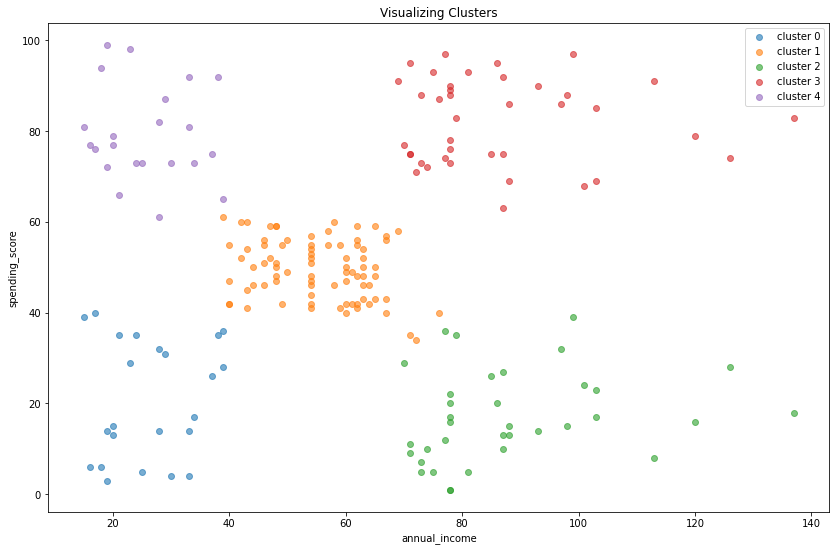

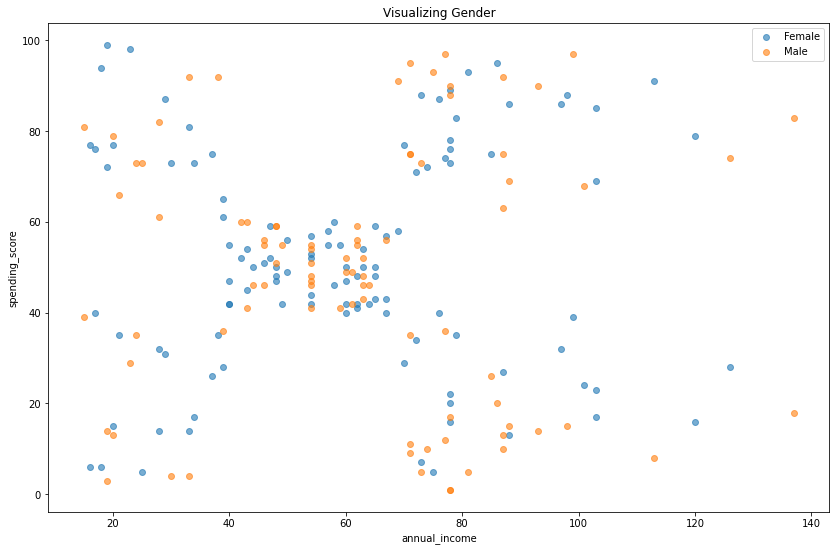

In [11]:
plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.annual_income, subset.spending_score, label='cluster ' + str(cluster), alpha=.6, cmap='reds')
plt.legend()
plt.xlabel('annual_income')
plt.ylabel('spending_score')
plt.title('Visualizing Clusters')
plt.show()


plt.figure(figsize=(14, 9))
for cluster, subset in df.groupby('gender'):
    plt.scatter(subset.annual_income, subset.spending_score, label=str(cluster), alpha=.6)
# centroids.plot.scatter(y='petal_length', x='sepal_length', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('annual_income')
plt.ylabel('spending_score')
plt.title('Visualizing Gender')
plt.show()


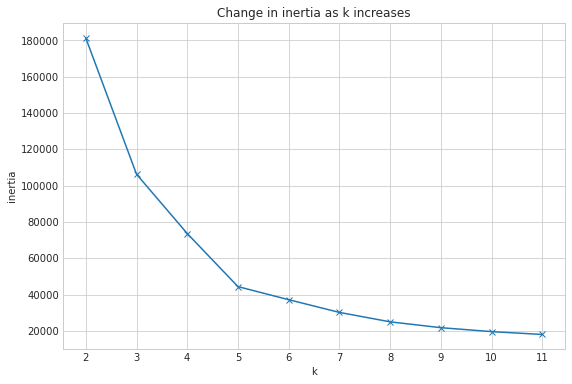

In [12]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')